In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR10
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta
import os
from PIL import Image
if torch.cuda.is_available():
    print(torch.cuda.device_count())
device = torch.device("cuda:0")
print(device)

3
cuda:0


In [2]:
import glob
import re
import json
from pathlib import Path
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)

In [3]:
histwindow = 3 #  過去何分のデータを食わせるか
batchsize = 200
epochs = 100
allsensors = (
    'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5',
    'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10',
    'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
    'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21')
#fpath = './Orchid_16_selected/'
# fpath = './orchid_0_50/'
fpath = '/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50'

In [4]:
alldata = {}
def sensdata(name):
    jso = open("./sonoda/{}/all.json".format(name))#ひとつのセンサーについて全ての時間のデータがひとつのファイルになってるものが　　all.json
    jsl = json.load(jso)#辞書型にする
    alldata[name] = jsl#全てのセンサーデータをひとつの辞書にする
for sname in allsensors:
    sensdata(sname)

In [5]:
files = glob.glob(fpath+'/*.jpg')#0から　５０度スケールのヒートマップフォルダ以下にある全てのjpgファイル
sdata = []
fdata = []
tdata = []
for file in files:#全ヒートマップについて
    reres = re.findall('.*/data_(20\d\d)(\d\d)(\d\d)_(\d\d)(\d\d)(\d\d).jpg', file)#ヒートマップファイルの日時を取得する
    (year, month, day, hour, minute, sec) = reres[0]
    dt_date = datetime(int(year), int(month), int(day), int(hour), int(minute), int(sec))#ヒートマップの日時をdatetime型に変換する
    dt_epoch = int((dt_date.timestamp()+30)/60)*60#日時をUNIX時間に変換し，？？？？？？？？？
    dt_adj = datetime.fromtimestamp(dt_epoch)# UNIX時間を日時に変換
    dt_prev = dt_adj
    time_adj = dt_adj.strftime('%Y-%m-%d-%H-%M')
    time_prev = time_adj
    sensd = []
    histerr = 0
    for hist in range(0, histwindow):#今回は過去３分
        for sname in allsensors:#全てのセンサーについて
            if alldata[sname].get(time_prev):#getメソッドでキーから値を取得
                sensd.append(alldata[sname][time_prev]['Temperature'])#センサの温度を数値だけ取得，最終的には3分分の温度が３つ並んだ配列
            else:
                histerr = 1#一つでもセンサーデータかけたらbreak
                break
        if histerr:
            break
        dt_prev = dt_prev - timedelta(minutes=1)#１分前のデータについても同様に処理
        time_prev = dt_prev.strftime('%Y-%m-%d-%H-%M')
    if not histerr:
        sdata.append(sensd)
        tdata.append(time_adj)
        fdata.append(file)
#        print(file, year, month, day, hour, minute, sec, dt_epoch, time_adj, time_prev)
    else:
        print('Error:'+file)

Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211230_045455.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220101_201617.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211229_000241.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220112_193520.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211228_190227.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220113_062810.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220114_100430.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211229_203439.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211228_122725.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220109_084430.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220113_074229.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211228_104203.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220114_093758.jpg
Error:/auto/

Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220112_111058.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211229_205540.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220113_162803.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220107_122040.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211228_152117.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211229_085936.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220109_202538.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220101_190234.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211228_032445.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220110_073454.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20220109_033102.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211229_045726.jpg
Error:/auto/proj/proj/NEDO-VEMS/sonoda/orchid_0_50/data_20211230_091807.jpg
Error:/auto/

In [6]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, transform=None):
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),#なぜこの数値で正規化したのか
        ])
        self.data_num = len(tdata)
    def __len__(self):
        return self.data_num
    def __getitem__(self, idx):
        image = Image.open(fdata[idx])
#        if self.transform:
#            out_data = self.transform(image)
        out_data = np.array(image).reshape(16*18).astype(np.int32) #ヒートマップをnumpy型に変換
        out_data = out_data*50/255# ヒートマップを輝度から温度に変換
        return torch.Tensor(sdata[idx]), torch.Tensor(out_data)　#センサデータとヒートマップデータをテンソル型で返す
data_set = MyDataset()

In [7]:
def heatmapshow(data):# 多分これはヒートマップを可視化する関数
    im = Image.fromarray(data[0].numpy().reshape([16,18]).copy()*255/50)
    fig, ax = plt.subplots()
    ax.imshow(im, cmap="gray")
    plt.show()

In [21]:
tmploader = DataLoader(data_set, batch_size=1, shuffle=True)
tmp = tmploader.__iter__()
xt, yt = tmp.next() 

In [22]:
xt#３分分のセンサーデータを表示

tensor([[16.4600, 15.6000, 16.3200, 15.6600, 16.2800, 16.3800, 22.8000, 16.5600,
         18.3200, 16.4600, 18.7200, 15.9000, 14.4000, 16.3600, 14.8800, 16.7200,
         15.0800, 16.4000, 15.7200, 15.7800, 15.8200, 16.6000, 15.6000, 16.4600,
         15.7000, 16.4000, 16.4200, 22.9000, 16.2000, 16.9600, 16.1000, 17.0800,
         15.6600, 14.5200, 16.4600, 14.7200, 16.8200, 14.7800, 16.4800, 15.7600,
         15.8400, 15.9000, 16.7400, 15.7000, 16.6000, 15.7000, 16.5400, 16.5000,
         22.9800, 16.2000, 16.1800, 16.1200, 16.3200, 15.6600, 14.7600, 16.5400,
         14.8600, 16.9200, 14.8800, 16.5800, 15.8400, 15.8800, 15.9800]])

In [10]:
xsize = len(xt)
xsize

1

In [11]:
yt#なんでここで16×18ではなくて　１×288が出てくるのか

tensor([[21.9608, 21.9608, 21.7647, 21.5686, 21.5686, 21.3725, 21.1765, 21.1765,
         21.1765, 21.1765, 21.3725, 21.5686, 21.5686, 21.7647, 21.9608, 21.9608,
         21.7647, 21.7647, 22.3529, 22.1569, 22.1569, 21.9608, 21.7647, 21.5686,
         21.3725, 21.3725, 21.3725, 21.3725, 21.5686, 21.7647, 21.9608, 21.9608,
         22.1569, 22.1569, 22.3529, 22.3529, 22.7451, 22.5490, 22.3529, 22.1569,
         21.9608, 21.5686, 21.3725, 21.3725, 21.5686, 21.5686, 21.7647, 21.7647,
         21.9608, 22.1569, 22.1569, 22.3529, 22.7451, 22.7451, 22.7451, 22.5490,
         22.3529, 21.9608, 21.7647, 21.3725, 21.1765, 21.1765, 21.5686, 21.5686,
         21.5686, 21.7647, 21.7647, 21.9608, 21.9608, 21.9608, 22.5490, 22.5490,
         22.3529, 22.1569, 21.9608, 21.7647, 21.5686, 21.1765, 20.9804, 20.9804,
         21.1765, 21.1765, 21.3725, 21.3725, 21.3725, 21.5686, 21.5686, 21.5686,
         21.7647, 21.7647, 21.9608, 21.7647, 21.7647, 21.5686, 21.3725, 21.3725,
         21.1765, 21.1765, 2

In [23]:
print(yt.shape)

torch.Size([1, 288])


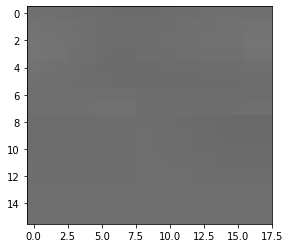

In [12]:
heatmapshow(yt)

In [13]:
train_size = len(data_set)*0.8
train_size

828.0

In [14]:
from torch.utils.data.dataset import Subset
def split_dataset(data_set, split_at, order=None):#order = Noneは，呼び出し時に指定されなかったらデフォルトで　Noneを使ってねといういう意味
    from torch.utils.data.dataset import Subset
    n_examples = len(data_set)
    if split_at < 0:
        raise ValueError('split_at must be non-negative')
    if split_at > n_examples:
        raise ValueError('split_at exceeds the dataset size')
    if order is not None:
        subset1_indices = order[0:split_at]
        subset2_indices = order[split_at:n_examples]
    else:
        subset1_indices = list(range(0,split_at))
        subset2_indices = list(range(split_at,n_examples))

    subset1 = Subset(data_set, subset1_indices)
    subset2 = Subset(data_set, subset2_indices)
    return subset1, subset2

def split_dataset_random(data_set, first_size, seed=0):
    order = np.random.RandomState(seed).permutation(len(data_set))
    return split_dataset(data_set, int(first_size), order)

In [15]:
train_dataset, val_dataset = split_dataset_random(data_set, train_size, seed=0)
train_loader = DataLoader(dataset=data_set, batch_size=batchsize, shuffle=True)
val_loader = DataLoader(dataset=data_set, batch_size=batchsize, shuffle=False)

In [16]:
class NET(nn.Module):
    def __init__(self):
        super(NET, self).__init__()
        self.fc1 = nn.Linear(xsize, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 16*18)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
model = NET().to(device)
model

NET(
  (fc1): Linear(in_features=1, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=288, bias=True)
)

In [17]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
def train(train_loader):
    model.train()
    running_loss = 0
    for batch_idx, (x, c) in enumerate(train_loader):
        x = x.to(device)
        c = c.to(device)
        optimizer.zero_grad()
        y = model(x)
        loss = criterion(y, c)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss = running_loss / len(train_loader) 
    return train_loss

def valid(val_loader):
    model.eval()
    running_loss = 0
    with torch.no_grad():
        for batch_idx, (x, c) in enumerate(val_loader):
            x = x.to(device)
            c = c.to(device)
            y = model(x)
            loss = criterion(y, c)
            running_loss += loss.item()
    val_loss = running_loss / len(val_loader)
    return val_loss

loss_list = []
val_loss_list = []
for epoch in range(epochs):
    loss = train(train_loader)
    val_loss = valid(val_loader)
    print('epoch %d, loss: %.4f val_loss: %.4f' % (epoch, loss, val_loss))
    loss_list.append(loss)
    val_loss_list.append(val_loss)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (200x63 and 1x128)

In [ ]:
plt.plot(range(len(loss_list)), loss_list, label="Train")
plt.plot(range(len(val_loss_list)), val_loss_list, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [ ]:
tmp = tmploader.__iter__()
xt, yt = tmp.next() 
model.eval()
with torch.no_grad():
    xtd = xt.to(device)
    ctd = model(xtd)
ctc = ctd.cpu()
ctc

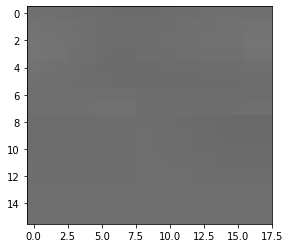

In [19]:
heatmapshow(yt)

In [20]:
heatmapshow(ctc)

NameError: name 'ctc' is not defined